In [99]:
from rdkit import Chem
from rdkit.Chem import rdDistGeom
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Geometry import Point3D
from rdkit.Chem import AllChem
from tqdm import tqdm
import os
import pandas as pd

In [76]:
data = pd.read_csv('./Caco-2 Permeability Dataset/LogPapp_cleaned_dataset.csv')
smi = data['SMILES']
mol = [Chem.MolFromSmiles(x) for x in smi]
mol_H = [Chem.AddHs(x) for x in mol]

In [34]:
'''
Molecules to remove:

1) smiles_w_dots_idx
2) charged_mol
3) failed_optimization
'''

In [77]:
smiles_w_dots = smi[smi.str.contains(r'\.', na=False)]
smiles_w_dots.index

Index([   1,   19,   64,   72,  191,  196,  227,  258,  260,  294,
       ...
       6198, 6257, 6258, 6259, 6273, 6274, 6275, 6277, 6278, 6319],
      dtype='int64', length=183)

In [78]:
smiles_w_dots_idx = list(smiles_w_dots.index)
smiles_w_dots_idx

[1,
 19,
 64,
 72,
 191,
 196,
 227,
 258,
 260,
 294,
 397,
 434,
 475,
 508,
 581,
 582,
 693,
 706,
 719,
 739,
 795,
 841,
 867,
 878,
 906,
 914,
 946,
 966,
 971,
 999,
 1113,
 1159,
 1162,
 1170,
 1172,
 1209,
 1286,
 1349,
 1506,
 1523,
 1590,
 1619,
 1659,
 1666,
 1700,
 1714,
 1738,
 1746,
 1771,
 1774,
 1782,
 1806,
 1854,
 1857,
 1877,
 1894,
 1899,
 1902,
 1918,
 1923,
 1982,
 2013,
 2031,
 2032,
 2070,
 2092,
 2131,
 2147,
 2165,
 2175,
 2202,
 2279,
 2324,
 2325,
 2341,
 2379,
 2380,
 2384,
 2396,
 2418,
 2419,
 2443,
 2446,
 2447,
 2451,
 2475,
 2477,
 2489,
 2506,
 2507,
 2526,
 2532,
 2553,
 2595,
 2616,
 2618,
 2694,
 2698,
 2736,
 2758,
 2776,
 2805,
 2807,
 2818,
 2864,
 2882,
 2883,
 2884,
 2885,
 2899,
 2925,
 2962,
 2963,
 2964,
 2970,
 2999,
 3000,
 3056,
 3064,
 3065,
 3066,
 3067,
 3087,
 3103,
 3110,
 3140,
 3178,
 3179,
 3180,
 3181,
 3182,
 3253,
 3289,
 3291,
 3294,
 3322,
 3451,
 3675,
 4405,
 4430,
 4437,
 4514,
 4846,
 5253,
 5497,
 5604,
 5685,
 5758,

In [79]:
is_charged = False
charged_mol = []
for i in range(len(smi)):
    for atom in mol[i].GetAtoms():
        if atom.GetFormalCharge() != 0:
            is_charged = True
    if is_charged:
        charged_mol.append(i)
        is_charged = False

In [80]:
len(charged_mol)

196

In [81]:
charged_mol

[22,
 28,
 72,
 125,
 173,
 210,
 228,
 248,
 283,
 356,
 409,
 410,
 426,
 450,
 494,
 495,
 516,
 517,
 608,
 716,
 740,
 743,
 810,
 862,
 902,
 906,
 971,
 972,
 1030,
 1058,
 1096,
 1159,
 1167,
 1214,
 1220,
 1292,
 1381,
 1431,
 1473,
 1474,
 1477,
 1591,
 1701,
 1705,
 1758,
 1768,
 1810,
 1821,
 1854,
 1868,
 1874,
 1876,
 1940,
 1953,
 1982,
 2057,
 2092,
 2119,
 2135,
 2178,
 2215,
 2229,
 2254,
 2315,
 2335,
 2351,
 2379,
 2458,
 2464,
 2502,
 2533,
 2537,
 2553,
 2600,
 2675,
 2694,
 2758,
 2776,
 2817,
 2882,
 2883,
 2899,
 2962,
 2999,
 3000,
 3056,
 3064,
 3065,
 3102,
 3110,
 3164,
 3178,
 3180,
 3289,
 3339,
 3451,
 3461,
 3471,
 3503,
 3504,
 3621,
 3675,
 3746,
 3751,
 3808,
 3905,
 3934,
 3938,
 3940,
 4019,
 4053,
 4056,
 4089,
 4405,
 4430,
 4437,
 4441,
 4470,
 4514,
 4591,
 4592,
 4846,
 4856,
 4895,
 4897,
 4948,
 4949,
 4978,
 4983,
 5004,
 5005,
 5049,
 5109,
 5171,
 5172,
 5173,
 5253,
 5407,
 5412,
 5413,
 5415,
 5416,
 5417,
 5420,
 5421,
 5422,
 5450,
 5

In [82]:
idx_to_remove = list(set(smiles_w_dots_idx + charged_mol))
len(idx_to_remove)

331

In [83]:
idx_to_remove.sort()
idx_to_remove

[1,
 19,
 22,
 28,
 64,
 72,
 125,
 173,
 191,
 196,
 210,
 227,
 228,
 248,
 258,
 260,
 283,
 294,
 356,
 397,
 409,
 410,
 426,
 434,
 450,
 475,
 494,
 495,
 508,
 516,
 517,
 581,
 582,
 608,
 693,
 706,
 716,
 719,
 739,
 740,
 743,
 795,
 810,
 841,
 862,
 867,
 878,
 902,
 906,
 914,
 946,
 966,
 971,
 972,
 999,
 1030,
 1058,
 1096,
 1113,
 1159,
 1162,
 1167,
 1170,
 1172,
 1209,
 1214,
 1220,
 1286,
 1292,
 1349,
 1381,
 1431,
 1473,
 1474,
 1477,
 1506,
 1523,
 1590,
 1591,
 1619,
 1659,
 1666,
 1700,
 1701,
 1705,
 1714,
 1738,
 1746,
 1758,
 1768,
 1771,
 1774,
 1782,
 1806,
 1810,
 1821,
 1854,
 1857,
 1868,
 1874,
 1876,
 1877,
 1894,
 1899,
 1902,
 1918,
 1923,
 1940,
 1953,
 1982,
 2013,
 2031,
 2032,
 2057,
 2070,
 2092,
 2119,
 2131,
 2135,
 2147,
 2165,
 2175,
 2178,
 2202,
 2215,
 2229,
 2254,
 2279,
 2315,
 2324,
 2325,
 2335,
 2341,
 2351,
 2379,
 2380,
 2384,
 2396,
 2418,
 2419,
 2443,
 2446,
 2447,
 2451,
 2458,
 2464,
 2475,
 2477,
 2489,
 2502,
 2506,
 2507

In [84]:
data.drop(index=idx_to_remove, inplace=True)
data

,SMILES,logPapp,priority
0,C=CCn1c(=O)c2cccnc2n(CC=C)c1=O,1.957607,1
2,N#CCc1ccccc1C#Cc1ccc(CCC(=O)O)cc1,1.959041,1
3,CCC(=O)N[C@H]1CC[C@@H](C(=O)N(C)c2ccc(-c3nc4cc...,1.973128,1
4,c1csc([C@]23CNC[C@H]2C3)c1,1.245513,1
5,c1cnc2ccc(Cn3nnc4nccnc43)cc2c1,1.607455,1
...,...,...,...
6325,OC[C@@H](O)[C@@H](O)[C@H](O)[14C@H](O)CO,-0.782716,2
6326,OCC1OC(OC2(CO)OC(CO)C(O)C2O)C(O)C(O)C1O,0.231467,2
6327,OC[C@H]1O[C@H](OC[C@H]2O[C@H](O[C@]3(CO)O[C@H]...,-1.317188,2
6328,CS(=O)(=O)Nc1ccc2c(c1)S(=O)(=O)NC(C1=C(O)[C@@H...,-1.096910,2


In [85]:
data.reset_index(drop=True, inplace=True)
data

,SMILES,logPapp,priority
0,C=CCn1c(=O)c2cccnc2n(CC=C)c1=O,1.957607,1
1,N#CCc1ccccc1C#Cc1ccc(CCC(=O)O)cc1,1.959041,1
2,CCC(=O)N[C@H]1CC[C@@H](C(=O)N(C)c2ccc(-c3nc4cc...,1.973128,1
3,c1csc([C@]23CNC[C@H]2C3)c1,1.245513,1
4,c1cnc2ccc(Cn3nnc4nccnc43)cc2c1,1.607455,1
...,...,...,...
5994,OC[C@@H](O)[C@@H](O)[C@H](O)[14C@H](O)CO,-0.782716,2
5995,OCC1OC(OC2(CO)OC(CO)C(O)C2O)C(O)C(O)C1O,0.231467,2
5996,OC[C@H]1O[C@H](OC[C@H]2O[C@H](O[C@]3(CO)O[C@H]...,-1.317188,2
5997,CS(=O)(=O)Nc1ccc2c(c1)S(=O)(=O)NC(C1=C(O)[C@@H...,-1.096910,2


In [86]:
data.to_csv('./Caco-2 Permeability Dataset/Filtered Data/3D_optimizable_dataset.csv', index=False)

In [100]:
# Generate xyz
smi = data['SMILES']
mol = [Chem.MolFromSmiles(x) for x in smi]
mol_H = [Chem.AddHs(x) for x in mol]
failed_optimization = []
for idx, m in tqdm(enumerate(mol_H)):
    if m.GetNumAtoms() > 90:
        success = rdDistGeom.EmbedMolecule(m, maxAttempts=2000, randomSeed=0)
    else:
        success = rdDistGeom.EmbedMolecule(m, randomSeed=0)

    if success == -1:
        failed_optimization.append(idx)

5999it [11:58,  8.35it/s]


In [104]:
failed_optimization

[1055,
 1118,
 1161,
 1197,
 1359,
 1493,
 1501,
 1538,
 1704,
 1895,
 1961,
 2035,
 2053,
 2135,
 2168,
 2182,
 2184,
 2447,
 2482,
 2492,
 2507,
 2521,
 2522,
 2536,
 2614,
 2615,
 2665,
 2722,
 2734,
 2877,
 2918,
 3000,
 3048,
 3291,
 3408,
 3448,
 3534,
 3623,
 3636,
 3876,
 3877,
 3917,
 3973,
 4189,
 4355,
 4359,
 5268,
 5278,
 5279,
 5280,
 5281,
 5282,
 5283,
 5288,
 5344,
 5349,
 5375,
 5381,
 5478]

In [103]:
for idx, m in enumerate(mol_H):
    Chem.rdmolfiles.MolToXYZFile(m, f'./3D Conformers/rdkit/xyz/mol_{idx}.xyz')

[18:26:13] Cannot write molecules with no conformers to XYZ block
[18:26:13] Cannot write molecules with no conformers to XYZ block
[18:26:13] Cannot write molecules with no conformers to XYZ block
[18:26:13] Cannot write molecules with no conformers to XYZ block
[18:26:13] Cannot write molecules with no conformers to XYZ block
[18:26:13] Cannot write molecules with no conformers to XYZ block
[18:26:13] Cannot write molecules with no conformers to XYZ block
[18:26:13] Cannot write molecules with no conformers to XYZ block
[18:26:14] Cannot write molecules with no conformers to XYZ block
[18:26:14] Cannot write molecules with no conformers to XYZ block
[18:26:14] Cannot write molecules with no conformers to XYZ block
[18:26:14] Cannot write molecules with no conformers to XYZ block
[18:26:14] Cannot write molecules with no conformers to XYZ block
[18:26:14] Cannot write molecules with no conformers to XYZ block
[18:26:14] Cannot write molecules with no conformers to XYZ block
[18:26:14]

In [105]:
data.drop(index=failed_optimization, inplace=True)
data

,SMILES,logPapp,priority
0,C=CCn1c(=O)c2cccnc2n(CC=C)c1=O,1.957607,1
1,N#CCc1ccccc1C#Cc1ccc(CCC(=O)O)cc1,1.959041,1
2,CCC(=O)N[C@H]1CC[C@@H](C(=O)N(C)c2ccc(-c3nc4cc...,1.973128,1
3,c1csc([C@]23CNC[C@H]2C3)c1,1.245513,1
4,c1cnc2ccc(Cn3nnc4nccnc43)cc2c1,1.607455,1
...,...,...,...
5994,OC[C@@H](O)[C@@H](O)[C@H](O)[14C@H](O)CO,-0.782716,2
5995,OCC1OC(OC2(CO)OC(CO)C(O)C2O)C(O)C(O)C1O,0.231467,2
5996,OC[C@H]1O[C@H](OC[C@H]2O[C@H](O[C@]3(CO)O[C@H]...,-1.317188,2
5997,CS(=O)(=O)Nc1ccc2c(c1)S(=O)(=O)NC(C1=C(O)[C@@H...,-1.096910,2


In [108]:
data.reset_index(drop=True, inplace=True)
data

,SMILES,logPapp,priority
0,C=CCn1c(=O)c2cccnc2n(CC=C)c1=O,1.957607,1
1,N#CCc1ccccc1C#Cc1ccc(CCC(=O)O)cc1,1.959041,1
2,CCC(=O)N[C@H]1CC[C@@H](C(=O)N(C)c2ccc(-c3nc4cc...,1.973128,1
3,c1csc([C@]23CNC[C@H]2C3)c1,1.245513,1
4,c1cnc2ccc(Cn3nnc4nccnc43)cc2c1,1.607455,1
...,...,...,...
5935,OC[C@@H](O)[C@@H](O)[C@H](O)[14C@H](O)CO,-0.782716,2
5936,OCC1OC(OC2(CO)OC(CO)C(O)C2O)C(O)C(O)C1O,0.231467,2
5937,OC[C@H]1O[C@H](OC[C@H]2O[C@H](O[C@]3(CO)O[C@H]...,-1.317188,2
5938,CS(=O)(=O)Nc1ccc2c(c1)S(=O)(=O)NC(C1=C(O)[C@@H...,-1.096910,2


In [111]:
data.to_csv('./Caco-2 Permeability Dataset/Filtered Data/3D_optimizable_dataset.csv', index=False)

In [106]:
# Generate xyz with optimizable molecules
smi = data['SMILES']
mol = [Chem.MolFromSmiles(x) for x in smi]
mol_H = [Chem.AddHs(x) for x in mol]
failed_optimization_2 = []
for idx, m in tqdm(enumerate(mol_H)):
    if m.GetNumAtoms() > 90:
        success = rdDistGeom.EmbedMolecule(m, maxAttempts=2000, randomSeed=0)
    else:
        success = rdDistGeom.EmbedMolecule(m, randomSeed=0)

    if success == -1:
        failed_optimization_2.append(idx)

5940it [09:40, 10.24it/s]


In [107]:
failed_optimization_2

[]

In [109]:
for idx, m in enumerate(mol_H):
    Chem.rdmolfiles.MolToXYZFile(m, f'./3D Conformers/rdkit/xyz/mol_{idx}.xyz')

In [110]:
# Generate mol files for Mordred 3D descriptors calculation
for idx, m in enumerate(mol_H):
    Chem.rdmolfiles.MolToMolFile(m, f'./3D Conformers/rdkit/mol/mol_{idx}.mol')

In [ ]:
# Subsequent codes beneath this line are redundant
#-----------------------------------------------------------------------------------------------------------------------------------------------------#

In [81]:
# directory = './3D Conformers/rdkit/xyz'
# zero_byte_idx = []

# for filename in os.listdir(directory):
#     filepath = os.path.join(directory, filename)
#     # Check if the file size is 0 bytes
#     if os.path.getsize(filepath) == 0:
#         try:
#             mol_idx = int(filename.split("_")[1].split(".")[0]) #Extract idx after "mol_" and before ".xyz"
#             zero_byte_idx.append(mol_idx)
#         except (IndexError, ValueError):
#             print(f"Error extracting index from filename: {filename}")

In [83]:
# len(zero_byte_idx)

71

In [ ]:
#transfers optimized coords from xyz to mol file
# atoms = []
# xyz_optimized_coords = []
# xyz_file = './3D Conformers/crest/xyz/crest_best_2.xyz'

# with open(xyz_file, 'r') as f:
#     for line_number,line in enumerate(f):
#         if line_number == 0:
#             num_atoms = int(line)
#         elif line_number == 1:
#             comment = line
#         else:
#             atomic_symbol, x, y, z = line.split()
#             atoms.append(atomic_symbol)
#             xyz_optimized_coords.append([float(x),float(y),float(z)])

# m = Chem.MolFromMolFile('./3D Conformers/rdkit/mol/mol_2.mol', removeHs=False)
# conf = m.GetConformer()
# for i in range(m.GetNumAtoms()):
#    x,y,z = xyz_optimized_coords[i]
#    conf.SetAtomPosition(i,Point3D(x,y,z))

# Chem.MolToMolFile(m, './3D Conformers/crest/mol/crest_best_2.mol')

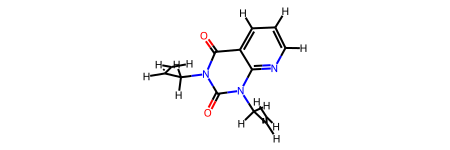

In [109]:
m

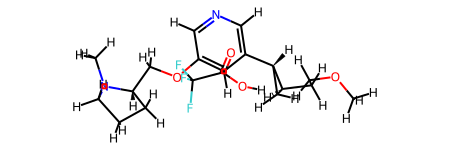

In [115]:
mol_H[1]

In [116]:
data['SMILES'][1]

'COCC[C@H]1C[C@@H]1c1cncc(OC[C@@H]2CCCN2C)c1.O=C(O)C(F)(F)F'

In [118]:
smiles_w_dots = smi[smi.str.contains(r'\.', na=False)]
len(smiles_w_dots)

183

In [127]:
smiles_w_dots.index

Index([   1,   19,   64,   72,  191,  196,  227,  258,  260,  294,
       ...
       6198, 6257, 6258, 6259, 6273, 6274, 6275, 6277, 6278, 6319],
      dtype='int64', length=183)

In [4]:
smiles_w_neg_charge = smi[smi.str.contains(r'\-', na=False)]
smiles_w_pos_charge = smi[smi.str.contains(r'\+', na=False)]

In [5]:
print(len(smiles_w_neg_charge))
print(len(smiles_w_pos_charge))

2206
189


In [6]:
smiles_w_neg_charge.index

Index([   3,    6,    7,    8,   11,   12,   16,   18,   22,   28,
       ...
       6300, 6301, 6302, 6303, 6307, 6308, 6313, 6318, 6324, 6329],
      dtype='int64', length=2206)

In [10]:
smiles_w_pos_charge.index

Index([  22,   28,   72,  125,  173,  210,  228,  248,  283,  356,
       ...
       6180, 6189, 6198, 6202, 6203, 6232, 6258, 6272, 6273, 6278],
      dtype='int64', length=189)

In [9]:
smi[3]

'CCC(=O)N[C@H]1CC[C@@H](C(=O)N(C)c2ccc(-c3nc4ccccc4o3)cc2)C1'

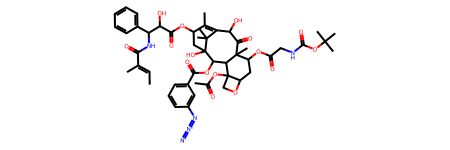

In [12]:
Chem.MolFromSmiles(smi[22])

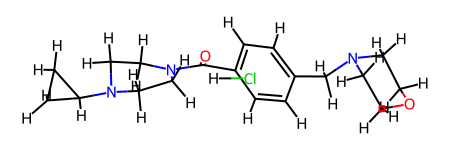

In [121]:
mol_H[19]

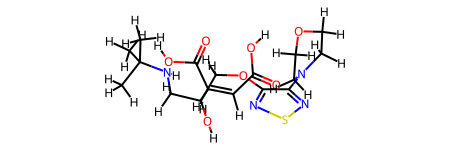

In [122]:
mol_H[6274]

In [128]:
smi[4213]

'CC(C)(F)C(=O)NC[C@@H]1CCCN1C(=O)C[C@H](N)Cc1cc(F)c(F)cc1F'